# Pymaceuticals Inc.
---

### Analysis

- The data shows the more a mouse weighs reduces the effectiveness of Capomulin treatments due to the moderate correlation between mouse weight and tumor size.

- The box plot shows Capomulin is the most consistent and effective treatment method for tumors with Ramicane coming in second.

- The least effective treatments are Infubinol and Ceftamin based on the box plot results being in the higher quartiles from the other treatments.
 

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
# Display the data table for preview
combined_data.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [139]:
# Checking the number of mice.

number_of_mice = len(combined_data['Mouse ID'].unique())
number_of_mice

249

In [140]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice= combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupe_mice

array(['g989'], dtype=object)

In [141]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupe_mice = combined_data.set_index("Mouse ID")
all_dupe_mice.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [142]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = all_dupe_mice.drop(['g989'])
clean_mice_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [143]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice = clean_mice_df.reset_index()

len(clean_data_mice['Mouse ID'].unique())

248

## Summary Statistics

In [144]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_group = clean_data_mice.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = round(tumor_group["Tumor Volume (mm3)"].mean(), 6)
median_tumor = round(tumor_group["Tumor Volume (mm3)"].median(), 6)
std_tumor = tumor_group["Tumor Volume (mm3)"].std()
var_tumor = tumor_group["Tumor Volume (mm3)"].var()
std_err_tumor = tumor_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_group_df = pd.DataFrame({
                                "Mean Tumor Volume" : mean_tumor,
                                "Median Tumor Volume" : median_tumor,
                                "Tumor Volume Variance" : var_tumor,
                                "Tumor Volume Std. Dev." : std_tumor,
                                "Tumor Volume Std. Err" :  std_err_tumor 
})

tumor_group_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 

# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumor_group_agg = clean_data_mice.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

#Add title Tumor Volume(mm3)
styles = [dict(selector="caption",
                       props=[("text-align", "right"),
                              ("font-size", "105%"),
                              ("color", 'black')])]
                              
                             

tumor_group_agg = tumor_group_agg.style.set_caption("Tumor Volume (mm3)").set_table_styles(styles)
tumor_group_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

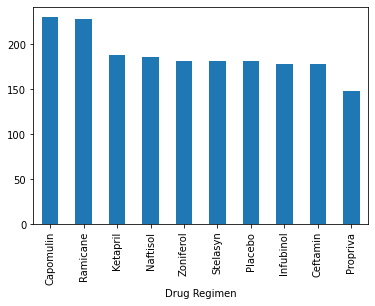

In [147]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_timepoint = clean_data_mice.groupby(['Drug Regimen'])['Timepoint'].count() 
mice_timepoint.sort_values(ascending=False).plot.bar()  
plt.show()

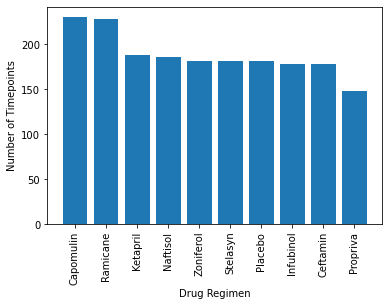

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

total_timepoint = mice_timepoint.sort_values(ascending=False)
plt.bar(total_timepoint.index, total_timepoint.values) 
plt.ylabel('Number of Timepoints', size=10) 
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical') 
plt.show()

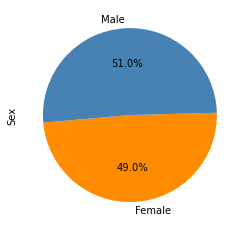

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["darkorange", "steelblue"]
gender = clean_data_mice.groupby(['Sex'])['Sex'].count()
gender.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(4, 4), colors=colors)


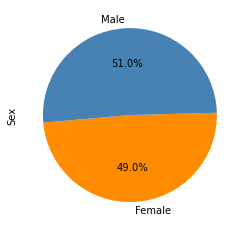

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["darkorange" , "steelblue"]
plt.pie(gender, labels=('Female', 'Male'), startangle=185, autopct='%1.1f%%', colors=colors)
plt.ylabel('Sex')  
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_data_mice.groupby(['Mouse ID'])['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_tp = pd.merge(clean_data_mice, greatest_tp_df, on=('Mouse ID', 'Timepoint'), how='inner')
combined_tp = combined_tp.rename(columns={'Timepoint' : 'Greatest Timepoint' })
combined_tp

,Mouse ID,Greatest Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for row in treatment:
    
    tumor_treatment_df = combined_tp.loc[combined_tp['Drug Regimen'] == row]


    subset_df =  tumor_treatment_df.loc[tumor_treatment_df['Greatest Timepoint'] ==  tumor_treatment_df['Greatest Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    data = subset_df['Tumor Volume (mm3)']
    treatment_data.append(data)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'{row} IQR : {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'{row} Lower Bound: {lower_bound}')
    print(f'{row} Upper Bound: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers = (data.loc[(subset_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (subset_df['Tumor Volume (mm3)'] <= lower_bound)])
    print(f'{row} potential outliers: {outliers}')
    print("-------------------------------------------------------------------------------")

Capomulin IQR : 7.781863460000004
Capomulin Lower Bound: 20.70456164999999
Capomulin Upper Bound: 51.83201549
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------------------------------------------
Ramicane IQR : 9.098536719999998
Ramicane Lower Bound: 17.912664470000003
Ramicane Upper Bound: 54.30681135
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------------------------------------------
Infubinol IQR : 11.477135160000003
Infubinol Lower Bound: 36.83290494999999
Infubinol Upper Bound: 82.74144559000001
Infubinol potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
-------------------------------------------------------------------------------
Ceftamin IQR : 15.577752179999997
Ceftamin Lower Bound: 25.355449580000002
Ceftamin Upper Bound: 87.66645829999999
Ceftamin potential outliers: Series([], Name: Tumor Volume

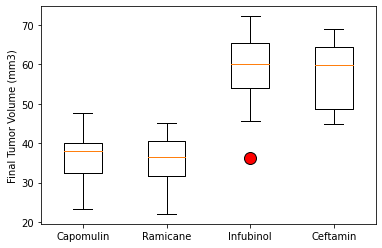

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_desc = dict(marker='o', markerfacecolor='r', markersize=12)
plt.boxplot(treatment_data, flierprops=plot_desc)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane' , 'Infubinol' , 'Ceftamin' ])

plt.show()


## Line and Scatter Plots

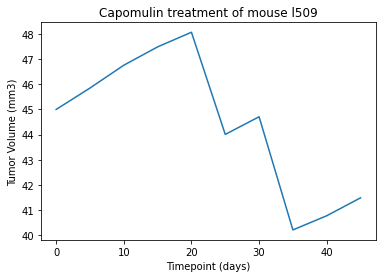

In [110]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


mouse_cap = clean_data_mice.loc[clean_data_mice["Mouse ID"] == "l509", :]

plt.plot(mouse_cap["Timepoint"], mouse_cap["Tumor Volume (mm3)"])

x_axis_lab = mouse_cap["Timepoint"]
y_axis_lab = mouse_cap["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

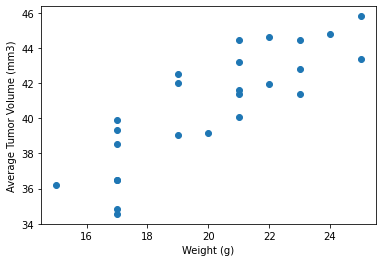

In [116]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_cap = clean_data_mice.loc[clean_data_mice['Drug Regimen'] == 'Capomulin']

avg_tumor = pd.DataFrame(scatter_cap.groupby('Mouse ID') ['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)" : "Avg Tumor Volume"})
                                                                                                                                  
                                                                                                                                  
# Merge average tumor volume onto data_df and drop duplicates
avg_tumor= pd.merge(scatter_cap, avg_tumor, on='Mouse ID')
clean_avg_tumor = avg_tumor[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()

x_values = clean_avg_tumor['Weight (g)']
y_values = clean_avg_tumor['Avg Tumor Volume']

plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


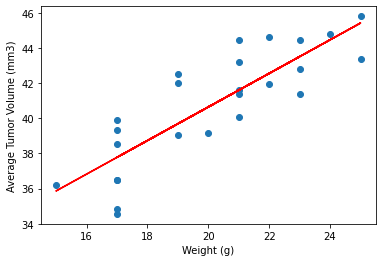

In [137]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


corr = st.pearsonr(x_values, y_values)
print(f"""The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values ,regression,"r-")


# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
